In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [10]:
infile = '/g/data/ua6/DRSv3/CMIP5/IPSL-CM5A-LR/historical/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_IPSL-CM5A-LR_historical_r1i1p1_185001-189912.nc'

In [11]:
ds = xr.open_dataset(infile, decode_times=False)
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, i: 182, j: 149, lev: 31, time: 600, vertices: 4)
Coordinates:
  * time          (time) float64 15.5 45.0 74.5 ... 1.817e+04 1.82e+04 1.823e+04
  * lev           (lev) float64 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
  * j             (j) int32 1 2 3 4 5 6 7 8 ... 142 143 144 145 146 147 148 149
  * i             (i) int32 1 2 3 4 5 6 7 8 ... 175 176 177 178 179 180 181 182
    lat           (j, i) float32 ...
    lon           (j, i) float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) float64 ...
    lev_bnds      (lev, bnds) float64 ...
    lat_vertices  (j, i, vertices) float32 ...
    lon_vertices  (j, i, vertices) float32 ...
    thetao        (time, lev, j, i) float32 ...
Attributes:
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          historical
    source:                 IPSL-CM5A-LR (2010)

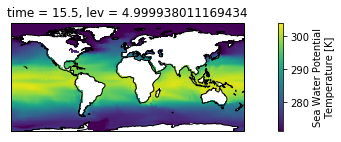

In [12]:
plt.figure(figsize=(12,2));
ax = plt.axes(projection=ccrs.PlateCarree());
ds['thetao'][0, 0, ::].plot.pcolormesh(ax=ax, x='lon', y='lat');
ax.coastlines();

In [13]:
ds_out = xe.util.grid_global(5, 4)

#ds_out = xr.Dataset({'lat': (['lat'], np.arange(-80, 81, 1)),
#                     'lon': (['lon'], np.arange(2, 362, 2)),
#                    }
#                   )

In [14]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')

Create weight file: bilinear_149x182_45x72.nc


ValueError: ESMC_FieldRegridStoreFile() failed with rc = 506.    Please check the log files (named "*ESMF_LogFile").